## Project 2

### Marissa Bradley

** CSC 19900 - Introduction to Data Science**

** Due Monday, Dec. 4**

### K-Means Clustering

In this project, you will implement a K-Means clustering algorithm. K-Means clustering is an algorithm that is used to group observations into some number of predetermined groups, or clusters. Objects are grouped together is a manner that minimized the overall distances between objects within the same group. 

### Part 1: Import Packages and Load the Data

Import the `numpy`, `pandas`, and `matplotlib.pyplot` packages under the names `np`, `pd`, and `plt`, respectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Use `read_csv()` to read the data stored in the `points.csv` file into a DataFrame called `points`. Print the head of the DataFrame.

In [2]:
points = pd.read_csv('points.csv')
print(points.head())

           x          y
0  45.494536  49.674003
1  44.345825  46.859928
2  40.012567  47.843311
3  52.022978  46.988596
4  48.102121  46.926888


The `points` DataFrame contains the `(x,y)` coordinates of several points. Use `plt.scatter()` to create a scatter plot of these points. 

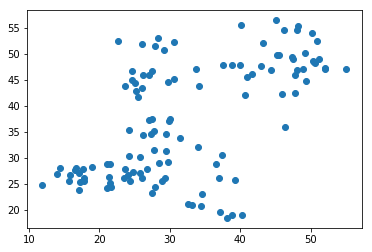

In [3]:
plt.scatter(points.loc[:,'x'], points.loc[:,'y'])
plt.show()

### Part 2: Write Helper Functions

Create a function called `distance()`. The function should take two parameters `P` and `Q`, which are intended to represent points. The function should return the distance between `P` and `Q`. 

In [4]:
def distance(P,Q):
    return ( (P[0] - Q[0])**2 + (P[1] - Q[1])**2 )**0.5

Create the functions `assign()`, `newCenters()`, and `icDist()` described in the instructions. You can create all of these in a single cell, or you can use multiple cells. 


In [5]:
def assign(pts,ctrs):
    clusters = []
    for i in range(0,len(pts)):
        pt1 = [pts.iloc[i,0],pts.iloc[i,1]]
        pt2 = [ctrs.iloc[0,0],ctrs.iloc[0,1]]
        tempAssign = 0
        minDist = distance(pt1,pt2)
        for j in range(0,len(ctrs)): # find distance between pts[i] and centers[j]
            pt2 = [ctrs.iloc[j,0],ctrs.iloc[j,1]]
            if distance(pt1,pt2) < minDist:
                minDist = distance(pt1,pt2)
                tempAssign = j
            clusters.append(tempAssign)
    return clusters

In [24]:
def newCenters(pts,clusters,K):
    xAvg = []
    yAvg = []
    for i in range(0,K):
        sel = (clusters == i)
        selpts = pts.iloc[sel,:]
        #select all points in cluster i
        
        #average x coordinates. Store xAvg in list.
        
        #average y coordinates. Store in yAvg list.
        
    #Add lists to a dataframe
    
    #return dataframe

In [25]:
def icDist(pts,clusters,ctrs):
    totalDist = 0
    for i in range(0,len(pts)):
        #Find the distance between: pts[i] and ctrs[clusters[i]]
        #total += newDist
        

### Part 3: Write the kMeans Function

Create a function called `kMeans()`. This function should take two parameters: `pts` and `K`. The parameter `pts` should be a DataFrame containing the points to be clustered, while `K` should state the number of desired clusters. 

The `kMeans()` function should repeat the process of finding centers, assigning clusters, and calculating inter-cluster distance until two consecutive inter-cluster distances are within 0.0001 of each other. 

The function does not need to return a value. Instead, it should generate a scatter plot of the points with each point colored to indicate its assigned cluster. 

In [9]:
def kMeans(pts, K):
    sel = np.random.choice(range(0,len(pts)),K,replace = False)
    centers = pts.iloc[sel,:]
    curDist = icDist(pts,centers,clusters)
    oldDist = icDist(pts,centers,clusters)
    while abs(oldDist - curDist) > .0001:
        oldDist = curDist
        clusters = assign(pts,centers)
        centers = newCenters(pts,clusters,K)
        curDist = icDist(pts,centers,clusters)
        plt.scatter(pts.loc[:,'x'],pts.loc[:,'y'],c= clusters)
        plt.scatter(centers.loc[:,'x'],centers.loc[:,'y'],c = 'Red')
        plt.show()

### Part 4: Run Clustering Algorithm

Run the `kMeans()` algorithm on the `points` DataFrame, using `K = 2`, `K = 3`, `K = 4`, and `K = 5`. Use a different cell for each function call. To increase the chances that we all get the same results, set the seed equal to 1 before each function call. 

In [10]:
np.random.seed(1)
K = 2
pts = points
kMeans(pts,K)

NameError: name 'icDist' is not defined

In [ ]:
np.random.seed(1)
K = 3
kMeans(points,K)

In [ ]:
np.random.seed(1)
K = 4
kMeans(points,K)

In [ ]:
np.random.seed(1)
K = 5
kMeans(points,K)

### Part 5: New Data

We will now randomly generate a new data set to run the clustering algorithm on. The cell below randomly generates a new set of points, and then creates a scatter plot of these points. Run this cell several times. 

Uncomments the line that sets the seed. Select a seed to use in your project. Do not use the same number as someone else. 

In [ ]:
#np.random.seed(1535)
x = [0]
y = [0]
for i in range(0,1000):
    x.append(x[-1] + np.random.uniform(-1,1))
    y.append(y[-1] + np.random.uniform(-1,1))

plt.scatter(x,y)
plt.show()

Create a DataFrame called `df`. This DataFrame should have two columns, `x` and `y`, whose values should come from the lists `x` and `y` defined in the previous cell. 

Then run the K-Means algorithm on the points in the DataFrame. Use K = 5. 

In [ ]:
df = pd.DataFrame({'x':x,'y':y})
K = 5
kMeans(df,K)